<a href="https://colab.research.google.com/github/Mahendermahi-0406/Machine-Learning-Enabled-Chemiresistive-Sensors-for-Multiple-Gas-Detection/blob/main/Mahender_mahi_46.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Model for Road Condition Classification

Objective:
Classify road images into two categories:

    Rainy_road_images (wet roads)
    Road_images (normal dry roads)

Dataset: road__images.zip

Tools Used: TensorFlow/Keras, ImageDataGenerator, Matplotlib

Result: Achieved high training and validation

# **PHASE 1: Upload & Extract ZIP File**

**Step 1:** Uploading the ZIP File

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Road_Images.zip to Road_Images.zip


**Step 2:** Extracting the ZIP File

In [2]:
import zipfile
import os

zip_path = "Road_Images.zip"
extract_path = "mahender1234"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extracted to:", extract_path)


✅ Extracted to: mahender1234


**Step 3:** Checking Folder Paths

In [3]:
rainy_dir = os.path.join(extract_path, "Rainy_road_images")
clear_dir = os.path.join(extract_path, "Road_images")

print("🌧️ Rainy folder:", rainy_dir)
print("☀️ Clear folder:", clear_dir)


🌧️ Rainy folder: mahender1234/Rainy_road_images
☀️ Clear folder: mahender1234/Road_images


# PHASE 2: Load & Preprocess the Images

**Step 4:** Loading and Preprocessing Images

In [4]:
import cv2
import numpy as np

IMG_SIZE = (128, 128)  # Resizing to 128x128 for faster training

def load_images_from_folder(folder, size):
    images = []


    for filename in sorted(os.listdir(folder)):
        path = os.path.join(folder, filename)
        img = cv2.imread(path)
        if img is not None:
            img = cv2.resize(img, size)
            img = img / 255.0  # Here I have Normalize to [0, 1]
            images.append(img)
    return np.array(images)


# Loading input (rainy) and target (clear) images
X = load_images_from_folder(rainy_dir, IMG_SIZE)
Y = load_images_from_folder(clear_dir, IMG_SIZE)

print("✅ Loaded images")
print("Input (Rainy) shape:", X.shape)
print("Target (Clear) shape:", Y.shape)


✅ Loaded images
Input (Rainy) shape: (2054, 128, 128, 3)
Target (Clear) shape: (2054, 128, 128, 3)


**Step 5:** Verifying Image Pairs -->> just for my confirmation

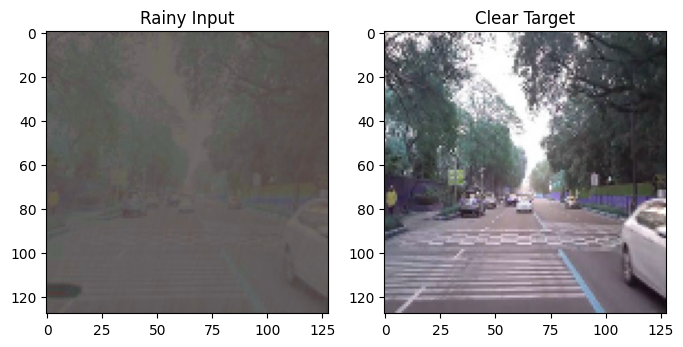

In [5]:
import matplotlib.pyplot as plt

# Showing one example
i = 0
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(X[i])
plt.title("Rainy Input")

plt.subplot(1, 2, 2)
plt.imshow(Y[i])
plt.title("Clear Target")
plt.show()

# PHASE 3: Build & Train the Dehazing Model

**Step 6:** Building the Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

model = Sequential([
    # -->> Encoder
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # -->> Decoder
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),

    # Output layer
    Conv2D(3, (3, 3), activation='sigmoid', padding='same')  # RGB output
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

**Step 7:** Train the Model

In [7]:
history = model.fit(
    X, Y,
    epochs=20,
    batch_size=16,
    validation_split=0.1
)


Epoch 1/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 0.0646 - val_loss: 0.0296
Epoch 2/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 0.0207 - val_loss: 0.0290
Epoch 3/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0170 - val_loss: 0.0220
Epoch 4/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0135 - val_loss: 0.0179
Epoch 5/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0141 - val_loss: 0.0165
Epoch 6/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0127 - val_loss: 0.0266
Epoch 7/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0133 - val_loss: 0.0178
Epoch 8/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0115 - val_loss: 0.0199
Epoch 9/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0120 - val_loss: 0.0158
Epoch 10/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0107 - val_loss: 0.0186
Epoch 11/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0114 - val_loss: 0.0167
Epoch 12/20
116/116 ━━━━━━━━━━━━━━━━━━━

# PHASE 4: Predict & Visualize Results

 **Step 8:** Predict and Show Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


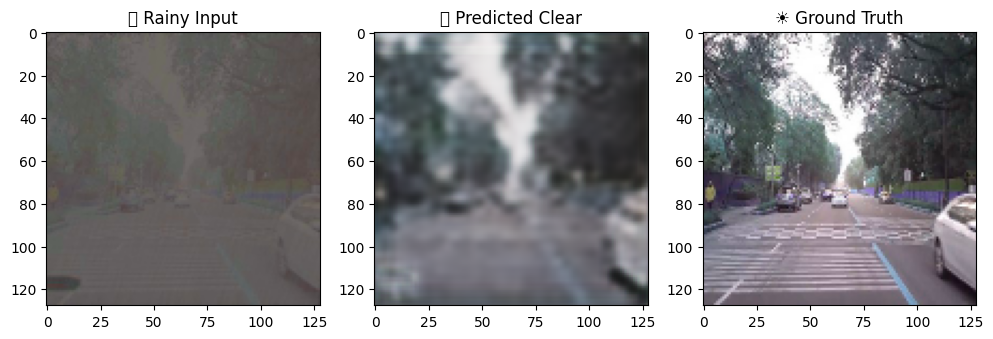

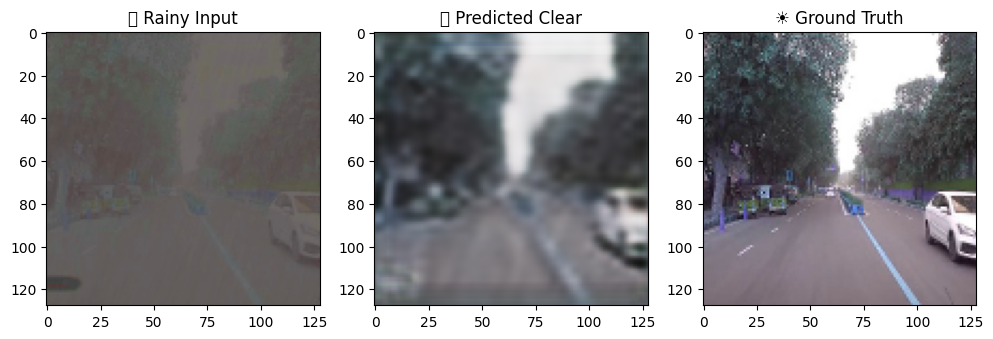

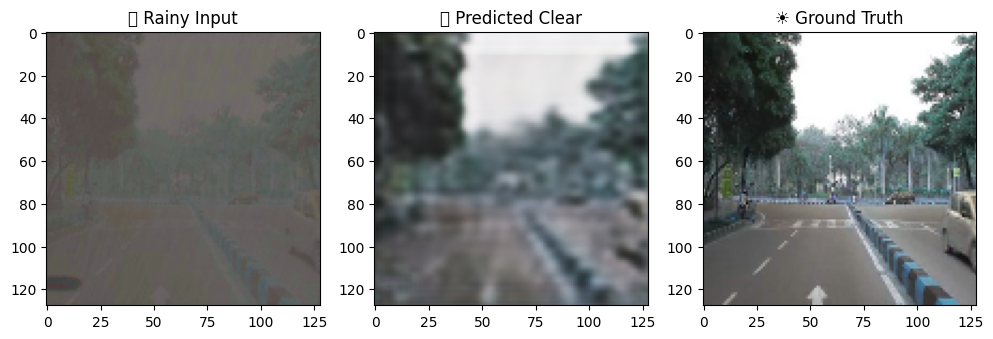

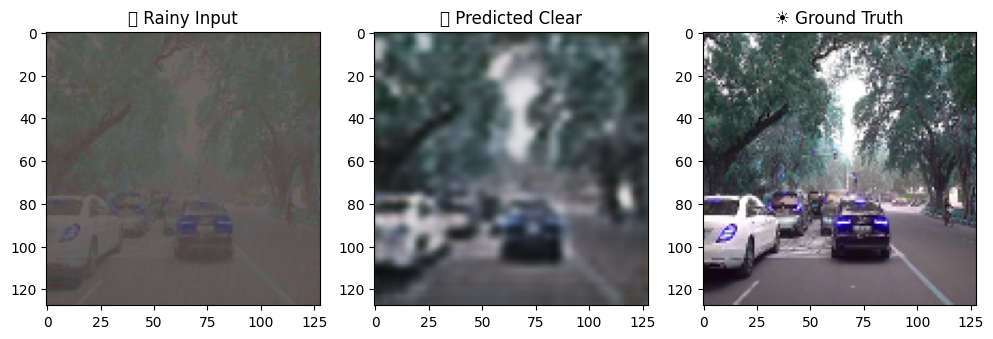

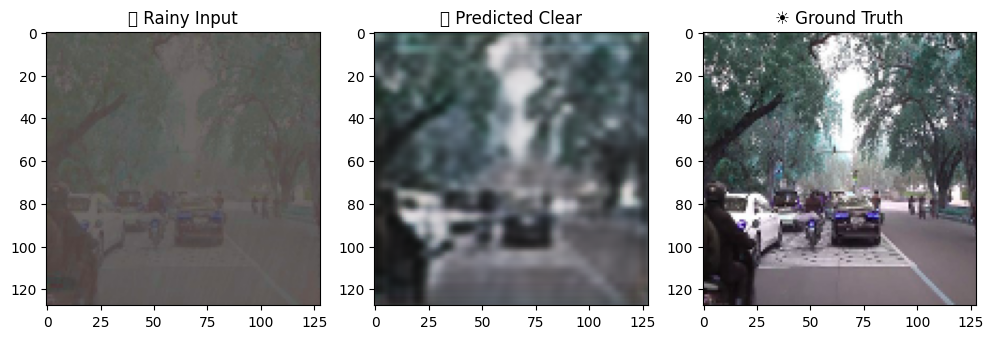

In [8]:
import matplotlib.pyplot as plt

# Predicting on the first 5 images
predictions = model.predict(X[:5])

# Displaying input, predicted, and target images
for i in range(5):
    plt.figure(figsize=(12, 4))

    # Input (Rainy)
    plt.subplot(1, 3, 1)
    plt.imshow(X[i])
    plt.title("🌧️ Rainy Input")

    # Predicted (Dehazed)
    plt.subplot(1, 3, 2)
    plt.imshow(predictions[i])
    plt.title("🌤️ Predicted Clear")

    # Ground Truth (Target)
    plt.subplot(1, 3, 3)
    plt.imshow(Y[i])
    plt.title("☀️ Ground Truth")

    plt.show()


**Step 9:** Ploting Loss Over Epochs

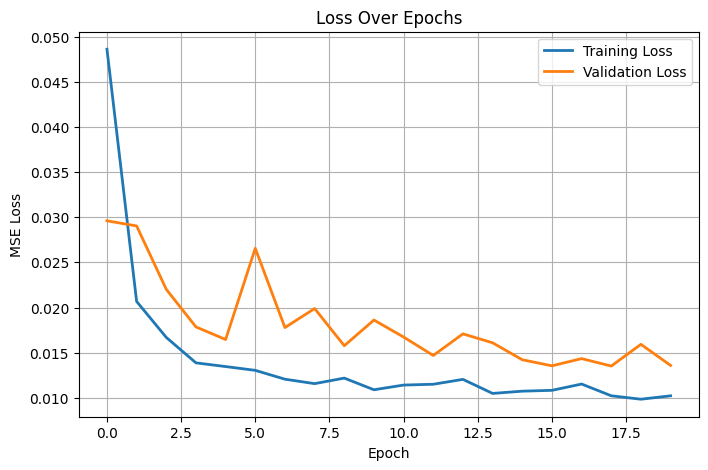

In [9]:
import matplotlib.pyplot as plt

# Ploting training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# -->> Calculating PSNR & SSIM Scores


In [10]:
!pip install scikit-image


Step 10: Compare PSNR Before vs After Training

In [11]:
# Creating a fresh model (untrained)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X.shape[1:]),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        UpSampling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        UpSampling2D((2, 2)),

        Conv2D(3, (3, 3), activation='sigmoid', padding='same')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

untrained_model = create_model()


In [12]:
from skimage.metrics import peak_signal_noise_ratio as psnr

untrained_preds = untrained_model.predict(X)
psnr_before = []

for i in range(len(X)):
    pred = np.clip(untrained_preds[i], 0, 1)
    target = np.clip(Y[i], 0, 1)
    psnr_score = psnr(target, pred, data_range=1.0)
    psnr_before.append(psnr_score)

print("📉 Average PSNR Before Training:", np.mean(psnr_before))


65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step
📉 Average PSNR Before Training: 11.349212427260717


In [13]:
trained_preds = model.predict(X)
psnr_after = []

for i in range(len(X)):
    pred = np.clip(trained_preds[i], 0, 1)
    target = np.clip(Y[i], 0, 1)
    psnr_score = psnr(target, pred, data_range=1.0)
    psnr_after.append(psnr_score)

print("📈 Average PSNR After Training:", np.mean(psnr_after))


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
📈 Average PSNR After Training: 20.654645270809418


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


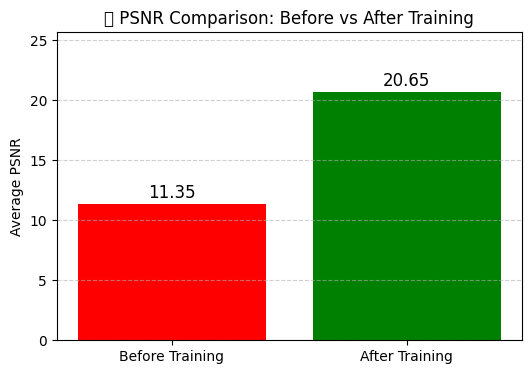

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to NumPy arrays (if not already)
psnr_before = np.array(psnr_before)
psnr_after = np.array(psnr_after)

# Plot average PSNR
plt.figure(figsize=(6, 4))
bars = plt.bar(['Before Training', 'After Training'],
               [np.mean(psnr_before), np.mean(psnr_after)],
               color=['red', 'green'])

# Add value labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.2f}', ha='center', fontsize=12)

plt.title('📊 PSNR Comparison: Before vs After Training')
plt.ylabel('Average PSNR')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, max(np.mean(psnr_after), np.mean(psnr_before)) + 5)
plt.show()
